# **Liquor and Alcohol: Warehouse and Retail Sales:**

>  **`Source`:** __https://www.kaggle.com/datasets/oscarm524/warehouse-and-retail-sales-of-liquor-and-alcohol__

This dataset contains a list of `sales` and `movement data` by item and department appended monthly from 2017 to 2020 from the Montgomery County, MD.

`YEAR`: Calendar year

`MONTH`: month of the year

`SUPPLIER`: supplier name

`ITEM CODE`: item code

`ITEM DESCRIPTION`: item description

`ITEM TYPE`: item type

`RETAIL SALES`: cases of product sold from DLC dispensaries

`RETAIL TRANSFERS`: cases of product transferred to DLC dispensaries

`WAREHOUSE SALES`: cases of product sold to MC licensees

#### **`Data Cleaning and Preparation:`**

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
%matplotlib inline

In [3]:
#  Disable future warnings:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Importing loading the dataset:

In [4]:
data= pd.read_csv("C:/Users/MyMachine/Desktop/Mission-Project/00_DataSets/23_Liquor_and_Alcohol-Warehouse_and_Retail_Sales_DataSet.csv")

Column names of this dataset:

In [5]:
data.columns

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')

Checking for the saape of the dataset:

In [6]:
print(data.shape)
print(F"Total Rows in the DataSet: {data.shape[0]}")
print(F"T0tal Columns in the DataSet: {data.shape[1]}")

(307645, 9)
Total Rows in the DataSet: 307645
T0tal Columns in the DataSet: 9


Checking for the datatypes of the columns:

In [7]:
data.dtypes

YEAR                  int64
MONTH                 int64
SUPPLIER             object
ITEM CODE            object
ITEM DESCRIPTION     object
ITEM TYPE            object
RETAIL SALES        float64
RETAIL TRANSFERS    float64
WAREHOUSE SALES     float64
dtype: object

In [8]:
data.head(3)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.0,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.0,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.0,0.0,1.0


For now,  all data types looks perfect and we are good to go.

Checking for null values:

In [9]:
data.isnull().sum().any()

np.True_

In [10]:
data.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

Out of more than 3 lakhs of data samples, very few samples contains missing or Na values. For this dataset, I can easily drop those data sampled containing missing values but, for now, I will replace them with appropriate measures.

1. `NaN` in `RETAIL SALES` will be replaced with mean value of the `RETAIL SALES` column.

2. `NaN` in `ITEM TYPE` will be replaced with `MODE` value of the column.

3. `NaN` in `SUPPLIER` will be replaced with `mode` of the column.

In [11]:
data["RETAIL SALES"]= data["RETAIL SALES"].replace(to_replace= np.nan, value= data["RETAIL SALES"].mean())

In [12]:
data["ITEM TYPE"].mode()[0]

'WINE'

In [13]:
data["ITEM TYPE"]=data["ITEM TYPE"].replace(to_replace= np.nan, value= data["ITEM TYPE"].mode()[0])

In [14]:
data["SUPPLIER"]= data["SUPPLIER"].replace(to_replace= np.nan, value= data["SUPPLIER"].mode()[0])

In [15]:
data.isnull().sum().any()

np.False_

So, now data is free from Missing values.

Now, I will check for Duplicate data in the dataset:

In [16]:
data.duplicated().any()

np.False_

This indicats no duplicate rows are present in the dataset.

Now, Renaming column names for easy working:

In [17]:
data.columns

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')

In [18]:
data.columns= ["year", "month", 'supplier', "item code", 'item description', "item type", 'retail sales', "retail transfers", "warehouse sales"]

In [19]:
data.columns

Index(['year', 'month', 'supplier', 'item code', 'item description',
       'item type', 'retail sales', 'retail transfers', 'warehouse sales'],
      dtype='object')

Replacing Month values (ie. 1, 2, 3, 4, ...) with actual month names and convert it to categorical data type:

In [20]:
data["month"].unique()

array([ 1,  9,  7,  3,  6,  8, 12, 10, 11,  2,  4,  5])

In [21]:
# Define a mapping of numeric month values to month names
month_mapping = {
    1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr',
    5: 'may', 6: 'jun', 7: 'jul', 8: 'aug',
    9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'
}

# Use replace() to map the numeric month values to corresponding month names
data["month"] = data["month"].replace(month_mapping)

# Define the ordered list of month names
month_names = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Convert the month column to a categorical type with an ordered list of categories
data["month"] = pd.Categorical(data["month"], categories=month_names, ordered=True)

In [22]:
data.head()

,year,month,supplier,item code,item description,item type,retail sales,retail transfers,warehouse sales
0,2020,jan,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,jan,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,jan,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,jan,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,jan,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [23]:
# Alternative way: 
'''
month_mapping = {
    1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr',
    5: 'may', 6: 'jun', 7: 'jul', 8: 'aug',
    9: 'sep', 10: 'oct', 11:'nov', 12:'dec'
}

# Use map() to replace numeric month values with month names
data["month"] = data["month"].map(month_mapping)

# Define the ordered list of month names
ordered_months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Convert the month column to a categorical data type with an ordered list
data["month"] = pd.Categorical(data["month"], categories=ordered_months, ordered=True)
'''

'\nmonth_mapping = {\n    1: \'jan\', 2: \'feb\', 3: \'mar\', 4: \'apr\',\n    5: \'may\', 6: \'jun\', 7: \'jul\', 8: \'aug\',\n    9: \'sep\', 10: \'oct\', 11:\'nov\', 12:\'dec\'\n}\n\n# Use map() to replace numeric month values with month names\ndata["month"] = data["month"].map(month_mapping)\n\n# Define the ordered list of month names\nordered_months = [\'jan\', \'feb\', \'mar\', \'apr\', \'may\', \'jun\', \'jul\', \'aug\', \'sep\', \'oct\', \'nov\', \'dec\']\n\n# Convert the month column to a categorical data type with an ordered list\ndata["month"] = pd.Categorical(data["month"], categories=ordered_months, ordered=True)\n'

In [24]:
data.dtypes

year                   int64
month               category
supplier              object
item code             object
item description      object
item type             object
retail sales         float64
retail transfers     float64
warehouse sales      float64
dtype: object

ALso, convert `suplier`, `item code`, `item description` and `item type` to Categorical data-type.

In [25]:
data["supplier"]= pd.Categorical(data["supplier"])
data["item code"]= pd.Categorical(data["item code"])
data["item description"]= pd.Categorical(data["item description"])
data["item type"]= pd.Categorical(data["item type"])

In [26]:
data.dtypes

year                   int64
month               category
supplier            category
item code           category
item description    category
item type           category
retail sales         float64
retail transfers     float64
warehouse sales      float64
dtype: object

So, the data is ready for further analysis.

In [27]:
data

,year,month,supplier,item code,item description,item type,retail sales,retail transfers,warehouse sales
0,2020,jan,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,jan,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,jan,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,jan,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,jan,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
...,...,...,...,...,...,...,...,...,...
307640,2020,sep,CONSTELLATION BRANDS,83825,WOODBRIDGE MOSCATO - 1.5L,WINE,3.39,0.0,0.0
307641,2020,sep,THE WINE GROUP,84163,FISH EYE SHZ - 1.5L,WINE,2.84,3.0,3.0
307642,2020,sep,LEGENDS LTD,98507,SCHLENKERLA URBOCK 20/16.9,BEER,0.00,0.0,1.0
307643,2020,sep,BOSTON BEER CORPORATION,99990,SAM ADAMS SUMMER VARIETY 12PK NR,BEER,20.50,0.0,0.0


-----

## **Exploratory Data Analysis:**

- `year and month`: Date information (time-based analysis)

- `supplier`: Supplier/manufacturer name

- `item code`: Unique code for item (for tracking)

- `item description`: Description/name of the product

- `item type`: Category/type of item (e.g., wine, vodka)

- `retail sales`: Retail-level sold quantity (to customers)

- `retail transfers`: Transfers between retail stores

- `warehouse sales`: Inventory sold from warehouse (to retail)

##### **1. Yearly Sales Trend:**	

In [28]:
# Yearly Sales Trend: 
data_yr= data.groupby(by= data["year"])[["retail sales", "retail transfers", 'warehouse sales']].sum().round().reset_index()
data_yr 

,year,retail sales,retail transfers,warehouse sales
0,2017,686735.0,676620.0,2333849.0
1,2018,153596.0,153653.0,519526.0
2,2019,960191.0,957562.0,3543371.0
3,2020,360399.0,346133.0,1385010.0


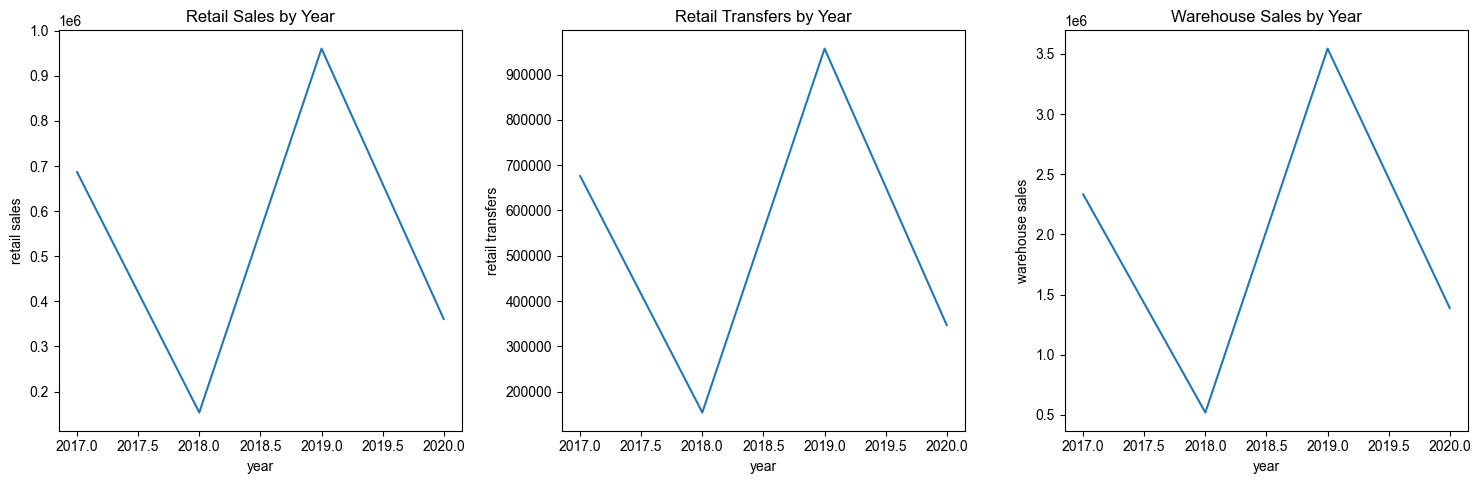

In [29]:
fig, ax= plt.subplots(1, 3, figsize=(15, 5))

# set theme for better look: 
sns.set_theme(style="whitegrid")
sns.lineplot(data=data_yr, x='year', y='retail sales', ax=ax[0])
ax[0].set_title('Retail Sales by Year')
sns.lineplot(data=data_yr, x='year', y='retail transfers', ax=ax[1])
ax[1].set_title('Retail Transfers by Year')
sns.lineplot(data=data_yr, x='year', y='warehouse sales', ax=ax[2])
ax[2].set_title('Warehouse Sales by Year')
plt.tight_layout()
plt.show()

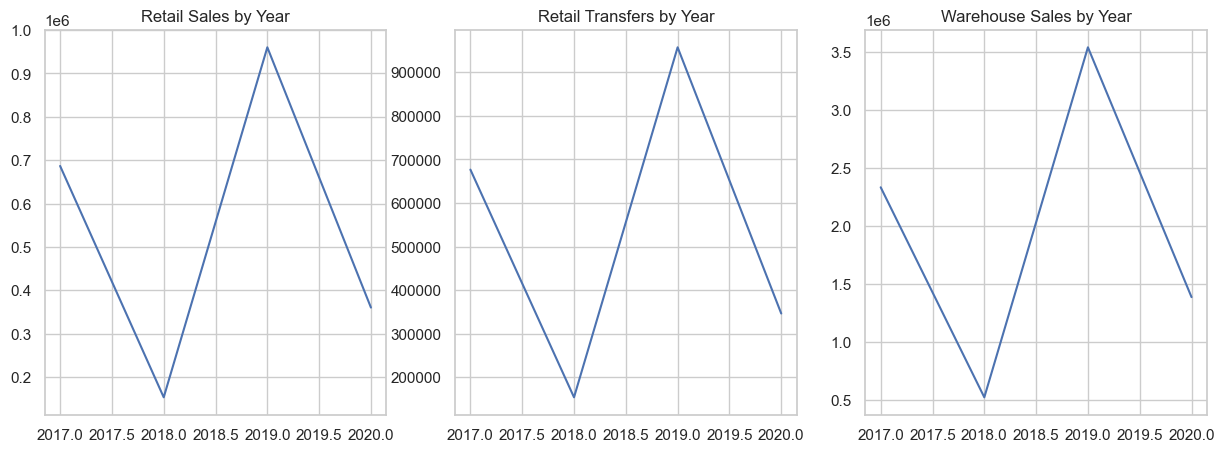

In [30]:
fig, ax= plt.subplots(1, 3, figsize=(15, 5))

# set theme for better look: 
sns.set_theme(style="whitegrid")
ax[0].plot(data_yr['year'], data_yr['retail sales'])
ax[0].set_title('Retail Sales by Year')
ax[1].plot(data_yr['year'], data_yr['retail transfers'])
ax[1].set_title('Retail Transfers by Year')
ax[2].plot(data_yr['year'], data_yr['warehouse sales'])
ax[2].set_title('Warehouse Sales by Year')
plt.show()

So, Retais Sales, Retail Transfer and warehouse Sales all have exactly same trend throught the years. And, as we see the sales are quiet volatile.

---

##### **2. Monthly Sales Trend:**

Here, I have to visualize the monthly sales trend on yearly basis. Also, all three types of sales data shows exactly same trend, I will focus on `retail sales` as it will generalize the trend of other twos too.

In [31]:
pt= pd.pivot_table(data= data, values= "retail sales", index= 'month',columns= 'year', aggfunc= 'sum', observed=True)

In [32]:
pt.reset_index()

year,month,2017,2018,2019,2020
0,jan,NaN,75791.77,76100.53,74318.770000
1,feb,NaN,77804.13,80113.54,NaN
2,mar,NaN,NaN,84441.04,109411.290000
3,apr,NaN,NaN,80342.58,NaN
4,may,NaN,NaN,94953.10,NaN
5,jun,97357.26,NaN,90860.39,NaN
6,jul,92625.29,NaN,90763.48,94545.984071
7,aug,87111.78,NaN,90628.61,NaN
8,sep,90452.60,NaN,82126.21,82122.728143
9,oct,89236.96,NaN,88230.41,NaN


This table shows the monthly sales trend on yearly basis.

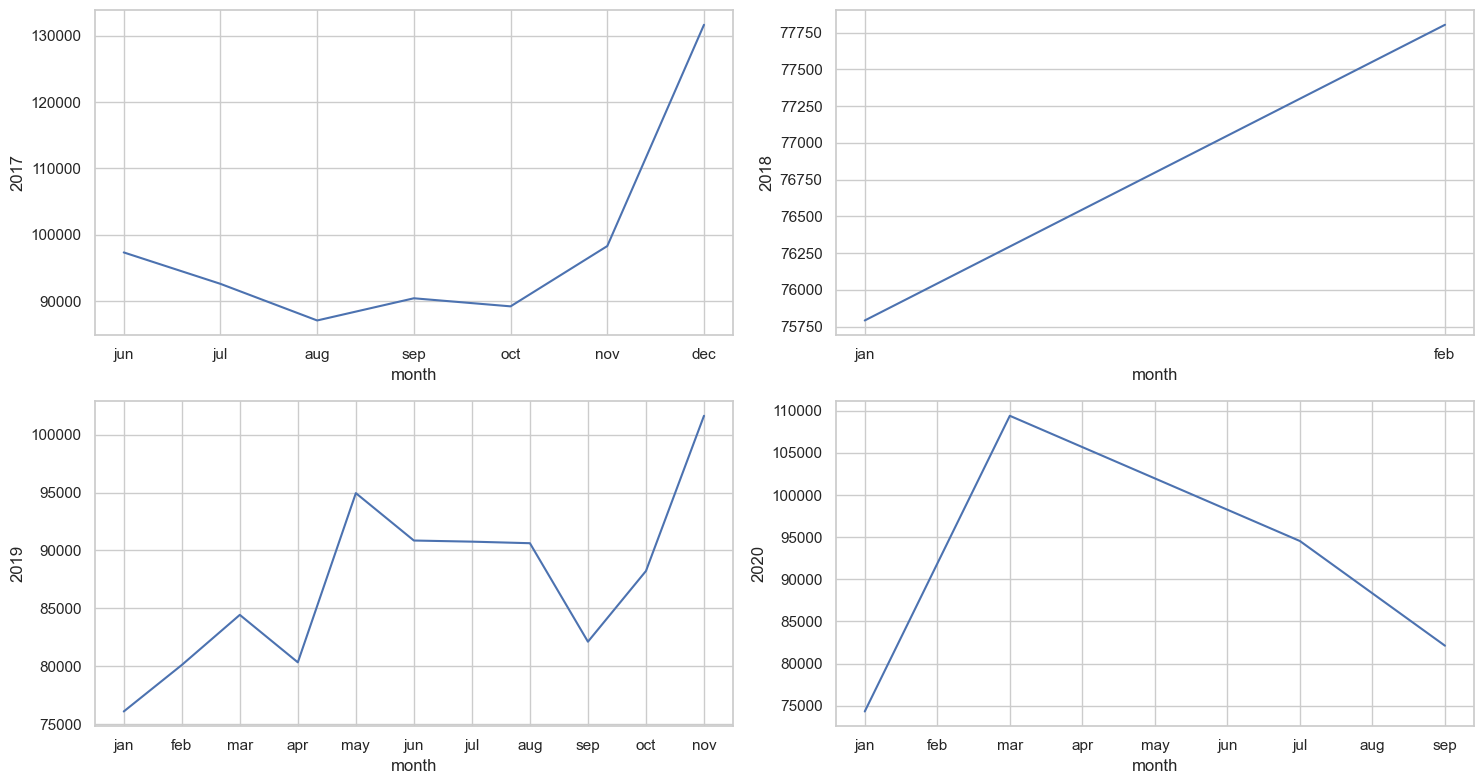

In [33]:
# Plotting in Graphs:
fig, ax= plt.subplots(2, 2, figsize= (15, 8))
sns.set_theme(style= "dark")
sns.lineplot(data= pt, x="month", y= 2017, ax= ax[0,0])
sns.lineplot(data= pt, x="month", y= 2018, ax= ax[0,1])
sns.lineplot(data= pt, x="month", y= 2019, ax= ax[1,0])
sns.lineplot(data= pt, x="month", y= 2020, ax= ax[1, 1])
plt.tight_layout()

**4. Top Selling Items:**	

Group by item description, sum retail sales, sort

In [34]:
# Overall Top selling items:
daa= data.groupby(by= "item description")["retail sales"].sum().sort_values(ascending= False).head(10)
daa= daa.reset_index()

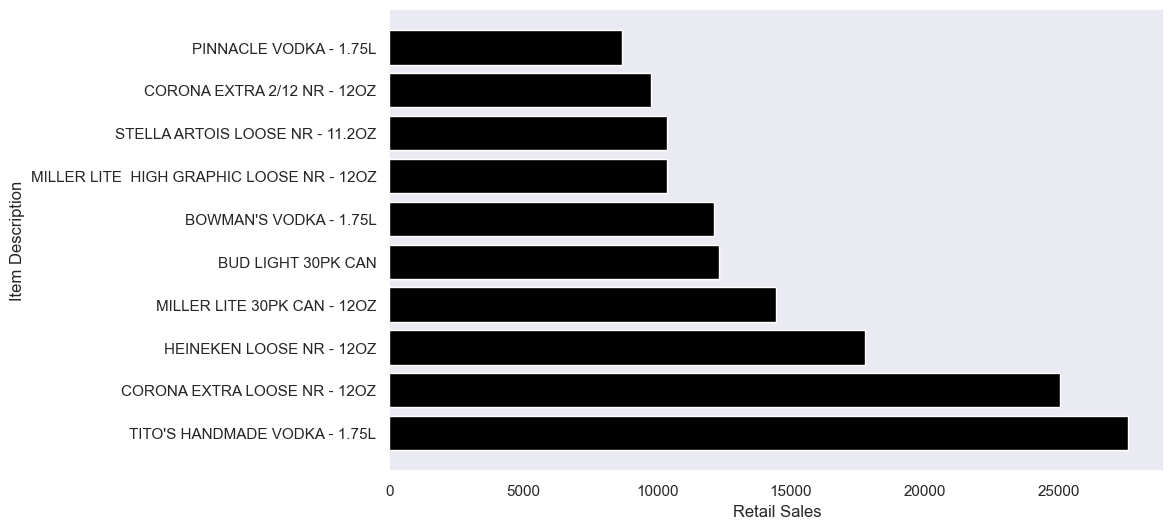

In [35]:
plt.figure(figsize=(10, 6))
plt.barh(y= "item description", width= "retail sales", data= daa, color= "black")
plt.xlabel("Retail Sales")
plt.ylabel("Item Description")
plt.show()

In [ ]:
'''# Using Seaborn: 
plt.figure(figsize= (6,6))
sns.barplot(data= daa, x= "retail sales", y= "item description")
plt.show()
'''